# Step-1:Business problem understanding

**Predict Survival**

# step-2:Data Understanding

 **Load Data & Understand every variable**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\python divers\train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape

(891, 12)

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df=df.drop(columns=['PassengerId','Name','Ticket','Cabin'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


***Exploratory Data Analysis***

In [7]:
continous=["Fare","Age"]
Discrete_count=["Pclass","Survived","SibSp","Parch"]
Discrete_categorical=["Sex","Embarked"]

In [8]:
df[continous].describe()

,Fare,Age
count,891.000000,714.000000
mean,32.204208,29.699118
std,49.693429,14.526497
min,0.000000,0.420000
25%,7.910400,20.125000
50%,14.454200,28.000000
75%,31.000000,38.000000
max,512.329200,80.000000


In [9]:
df[continous].corr()

,Fare,Age
Fare,1.000000,0.096067
Age,0.096067,1.000000


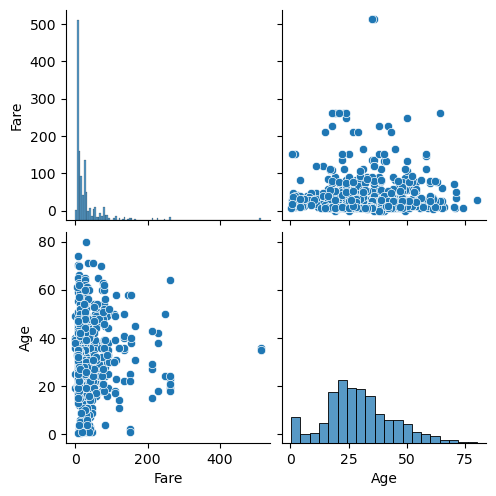

In [10]:
sns.pairplot(df[continous])
plt.show()

In [11]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [12]:
df[continous].skew()

Fare    4.787317
Age     0.389108
dtype: float64

In [13]:
from scipy import stats
df["Fare"],param=stats.boxcox(df.Fare+0.01)
print(" λ=",param)
df["Fare"].skew()

 λ= 0.18091321955494596


0.25282461235568676

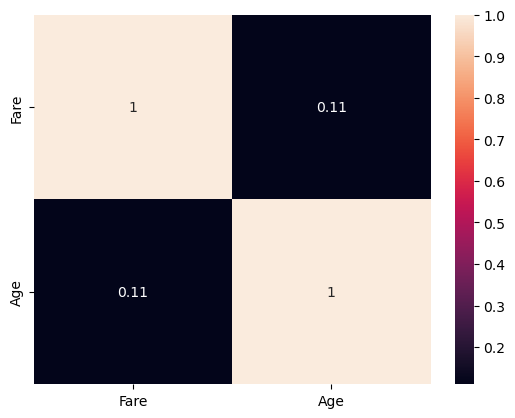

In [14]:
sns.heatmap(df[continous].corr(),annot=True)
plt.show()

In [15]:
df[Discrete_count].describe()

,Pclass,Survived,SibSp,Parch
count,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.383838,0.523008,0.381594
std,0.836071,0.486592,1.102743,0.806057
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,0.000000
max,3.000000,1.000000,8.000000,6.000000


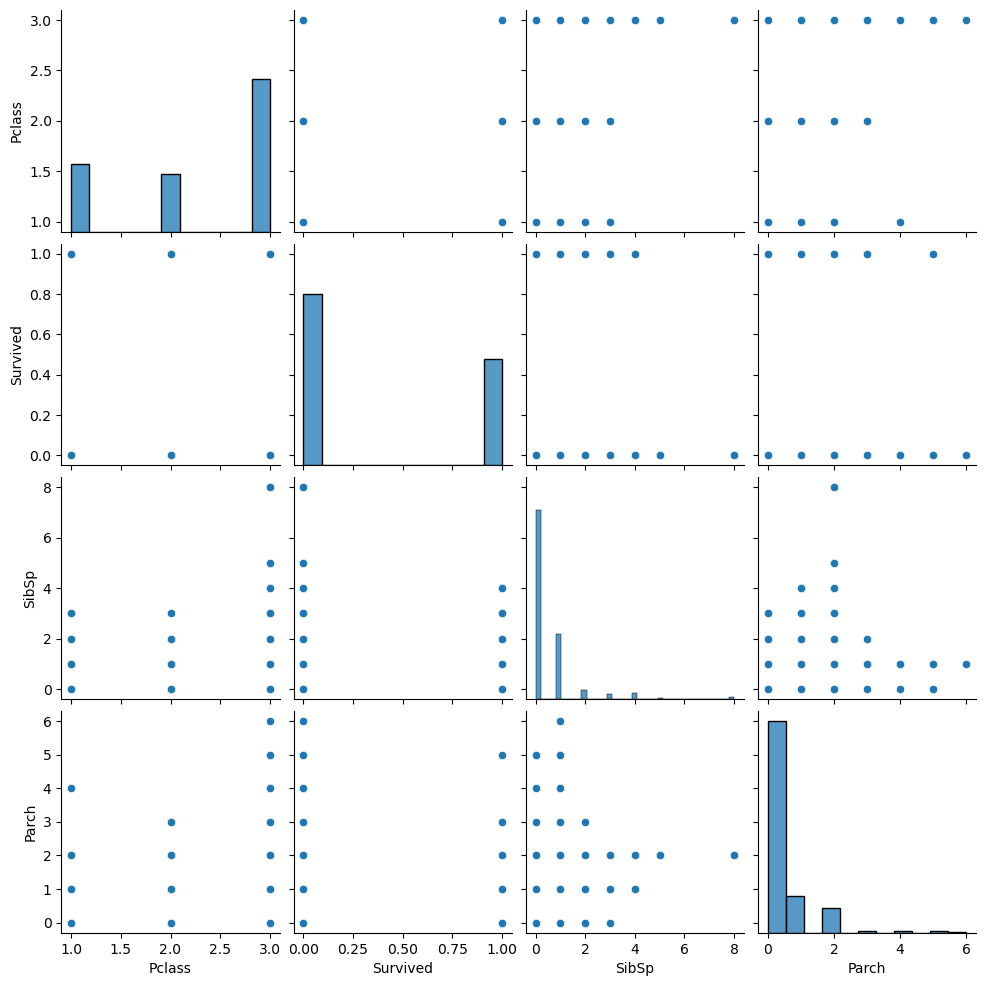

In [16]:
sns.pairplot(df[Discrete_count])
plt.show()

In [17]:
df[Discrete_categorical].describe()

,Sex,Embarked
count,891,889
unique,2,3
top,male,S
freq,577,644


In [18]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [19]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [20]:
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [21]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

**Check for outliers**

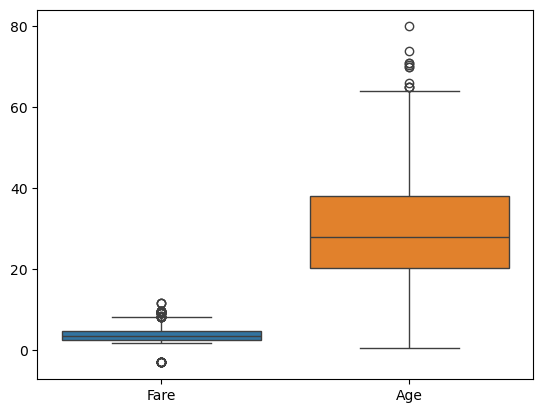

In [22]:
sns.boxplot(df[continous])
plt.show()

# Step-3: Data Preprocessing

**Data Cleaning**

In [23]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

**Replace**

In [25]:
df["Age"]=df["Age"].fillna(df["Age"].median())
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [26]:
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])
df["Embarked"]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [27]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

**Outliers Treatment**

In [28]:
#Retrain the Outliers

# Data Wrangling

In [29]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,2.384456,S
1,1,1,female,38.0,1,0,6.433577,C
2,1,3,female,26.0,0,0,2.512739,S
3,1,1,female,35.0,1,0,5.813111,S
4,0,3,male,35.0,0,0,2.535507,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,3.265085,S
887,1,1,female,19.0,0,0,4.700392,S
888,0,3,female,28.0,1,2,4.254769,S
889,1,1,male,26.0,0,0,4.700392,C


**Encoding**

In [30]:
df["Sex"]=df["Sex"].replace({"female":0,"male":1})
df["Sex"]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [31]:
df["Embarked"]=df["Embarked"].replace({"C":0,"Q":1,"S":2})
df["Embarked"]

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 891, dtype: int64

In [32]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,2.384456,2
1,1,1,0,38.0,1,0,6.433577,0
2,1,3,0,26.0,0,0,2.512739,2
3,1,1,0,35.0,1,0,5.813111,2
4,0,3,1,35.0,0,0,2.535507,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,3.265085,2
887,1,1,0,19.0,0,0,4.700392,2
888,0,3,0,28.0,1,2,4.254769,2
889,1,1,1,26.0,0,0,4.700392,0


**X and y**

In [33]:
x=df.drop("Survived",axis=1)
y=df["Survived"]

**Random Score**

In [34]:
train=[]
test=[]
cv=[]

for i in range(0,100):
    from sklearn.model_selection import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state =i)

    from sklearn.linear_model import LinearRegression
    l = LinearRegression()
    l.fit(x_train,y_train)
    
    train_score = l.score(x_train,y_train)
    test_score = l.score(x_test,y_test)
    
    train.append(train_score)
    test.append(test_score)
    
#    y_pred_train = l.predict(x_train,y_train)
 #   y_pred_test = l.predict(x_test,y_test)

 #   train.append(l.score(y_pred_train))
  #  test.append(l.score(y_pred_test))
    
    from sklearn.model_selection import cross_val_score
    cv.append(cross_val_score(l,x_train,y_train,cv=5,scoring="r2").mean())
    
em = pd.DataFrame({"train": train,"test": test,"cv":cv})
gm = em[(abs(em["train"]-em["test"])<=0.05)&(abs(em["test"]-em["cv"])<=0.05)]
print("best_random_number:",gm[gm["cv"]==gm["cv"].max()].index.to_list()[0])

best_random_number: 48


In [35]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,2.384456,2
1,1,1,0,38.0,1,0,6.433577,0
2,1,3,0,26.0,0,0,2.512739,2
3,1,1,0,35.0,1,0,5.813111,2
4,0,3,1,35.0,0,0,2.535507,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,3.265085,2
887,1,1,0,19.0,0,0,4.700392,2
888,0,3,0,28.0,1,2,4.254769,2
889,1,1,1,26.0,0,0,4.700392,0


In [36]:
df.to_excel("cleaned_Titanic.xlsx")

In [37]:
pwd

'C:\\Users\\Aravind\\Titanic ML Project'